In [2]:

from utilities.molecule import Molecule, Element
from utilities.periodic_table import get_periodic_table
from utilities.SIMS_Spectra_class import SIMS_Spectra
from matplotlib.patches import FancyArrowPatch
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter)

In [3]:
single_element = ["H", "K", "Na", "Cu", "Zn", "Al", "CH3", "C2H5"]
other_elements = []
spectra = SIMS_Spectra("../data/ToF-SIMS_data/raw_spectra/P_HEA19_Bi5_1.txt",
                       single_other_component = single_element,
                       indice_max=3,
                       #components= ["Ru", "Pt", "Pd"],
                       max_molecules=4,
                       other_elements= other_elements)


Spectra loaded from '../data/ToF-SIMS_data/raw_spectra/P_HEA19_Bi5_1.txt'

Creation of the Isotope DataFrame with ['Ru', 'Rh', 'Pd', 'Pt', 'Ir'] up to 3 indices for the mz range of 0 to 1800


100%|██████████| 788/788 [00:23<00:00, 32.86it/s] 



Isotope DataFrame created, 788 isotopes considered for quantification
Quantification done --> 285 molecules out of 788 where quantified in the spectra
Residual of the fit: 325207

----------------------------------------------------------------------------------------------


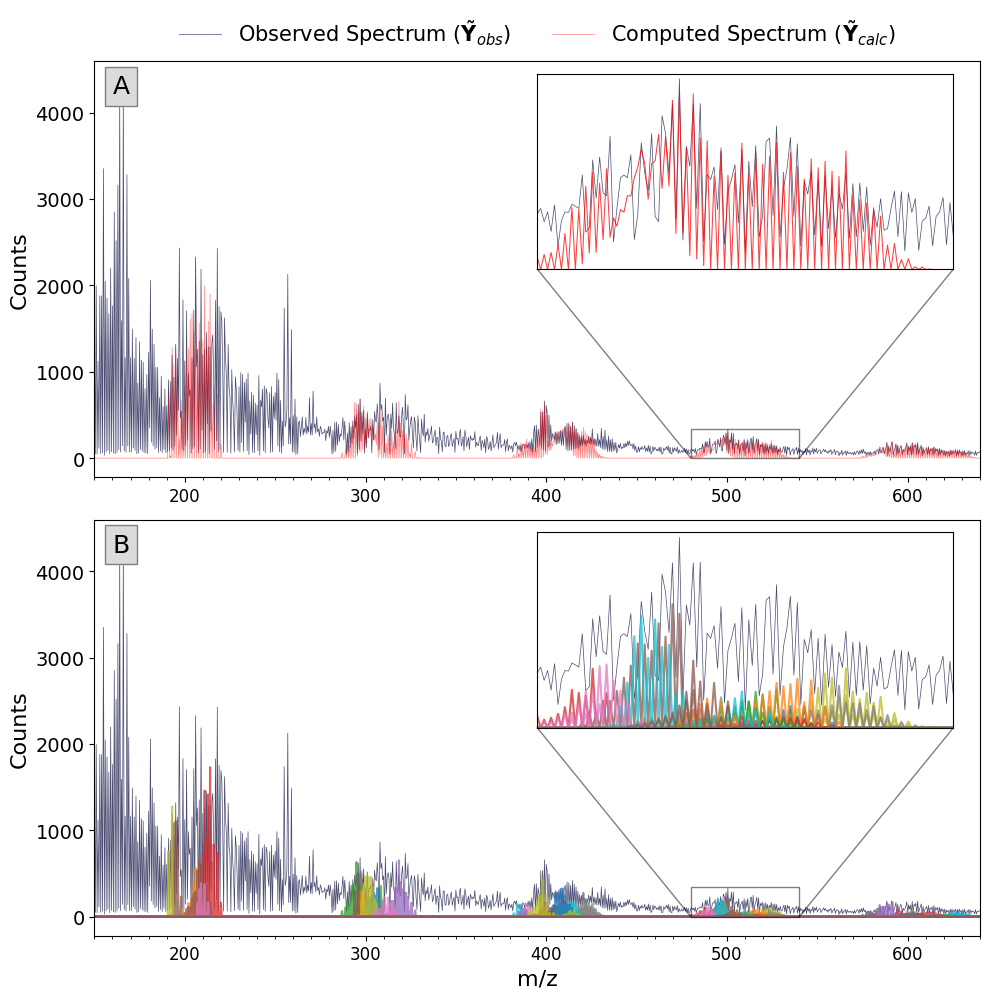

In [ ]:
xlim = (150, 640)
index_range = np.where(np.logical_and(spectra.bin_mz >= xlim[0], spectra.bin_mz <= xlim[1]))
bin_mz = spectra.bin_mz[index_range]
bin_spectra = spectra.bin_intensities[index_range]
computed_spectra = spectra.computed_intensities[index_range]
df = spectra.individual_molecule_spectra_df.iloc[index_range]
df = df.iloc[:, (df !=0).any().values]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=True, figsize=(10, 10))

# First subplot: Compare observed spectra and computed spectra
ax1.plot(bin_mz, bin_spectra,linewidth = 0.5, color ="#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
ax1.plot(bin_mz, computed_spectra, color='red', label=r"Computed Spectrum ($\tilde{\mathbf{Y}}_{calc}$)", alpha = 0.5, linewidth = 0.5)
ax1.set_xlim(xlim)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.get_offset_text().set_fontsize(14)
ax1.get_xaxis().set_visible(True)
ax1.set_ylabel("Counts", fontsize=16)
ax1.legend(fontsize=15, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15),  ncol =5)

# Filter the data for the inset plot
inset_xlim = (480, 540)
inset_index_range = np.where(np.logical_and(bin_mz >= inset_xlim[0], bin_mz <= inset_xlim[1]))
inset_bin_mz = bin_mz[inset_index_range]
inset_bin_spectra = bin_spectra[inset_index_range]
inset_computed_spectra = computed_spectra[inset_index_range]

# Create the inset plot for the first subplot
axins1 = ax1.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = inset_xlim, ylim = (0.75, 340))
axins1.plot(inset_bin_mz, inset_bin_spectra, linewidth=0.5, color="#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
axins1.plot(inset_bin_mz, inset_computed_spectra, color='red', label=r"Computed Spectrum ($\tilde{\mathbf{Y}}_{calc}$)", alpha = 0.75, linewidth = 0.75)
axins1.yaxis.set_visible(False)
axins1.xaxis.set_visible(False)
ax1.indicate_inset_zoom(axins1, edgecolor="black")

# Add annotation "A" to the first subplot
ax1.text(0.03, 0.94, 'A', transform=ax1.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))

# Second subplot: Decomposition of observed spectra into individual elements
ax2.plot(bin_mz, bin_spectra, linewidth=0.5,  alpha=1, color = "#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
for column in df.columns[1:]:
    ax2.plot(bin_mz, df[column], label=column, alpha = 0.75)

ax2.xaxis.set_major_locator(MultipleLocator(100))
ax2.xaxis.set_minor_locator(AutoMinorLocator(10))
ax2.tick_params(axis='x', which='major', labelsize=12)
#ax2.legend(fontsize=15, frameon=False)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_ylabel("Counts", fontsize=16)
ax2.set_xlabel("m/z", fontsize=16)


# Add annotation "B" to the second subplot
ax2.text(0.03, 0.94, 'B', transform=ax2.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))

# Filter the data for the inset plot
inset_index_range = np.where(np.logical_and(bin_mz >= inset_xlim[0], bin_mz <= inset_xlim[1]))
inset_bin_mz = bin_mz[inset_index_range]
inset_bin_spectra = bin_spectra[inset_index_range]
inset_df = df.iloc[inset_index_range]
bottom_values = np.zeros_like(inset_bin_mz)

# Create the inset plot
axins = ax2.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = inset_xlim, ylim = (0.75, 340), yticklabels=[], yticks = [])
axins.yaxis.set_visible(False)
axins.xaxis.set_visible(False)
axins.plot(inset_bin_mz, inset_bin_spectra, linewidth=0.5, alpha=1, color="#494B70", label=r"Observed Spectrum ($\mathbf{Y}$)")
for column in inset_df.columns[1:]:
    axins.plot(inset_bin_mz, inset_df[column], label=column, alpha=0.75)
    #axins.bar(inset_bin_mz, inset_df[column], label=column, alpha=0.75, bottom=bottom_values)
    #bottom_values += inset_df[column]

# Adjust layout
ax2.indicate_inset_zoom(axins, edgecolor="black")
plt.xlim(xlim[0], xlim[1])
plt.tight_layout()


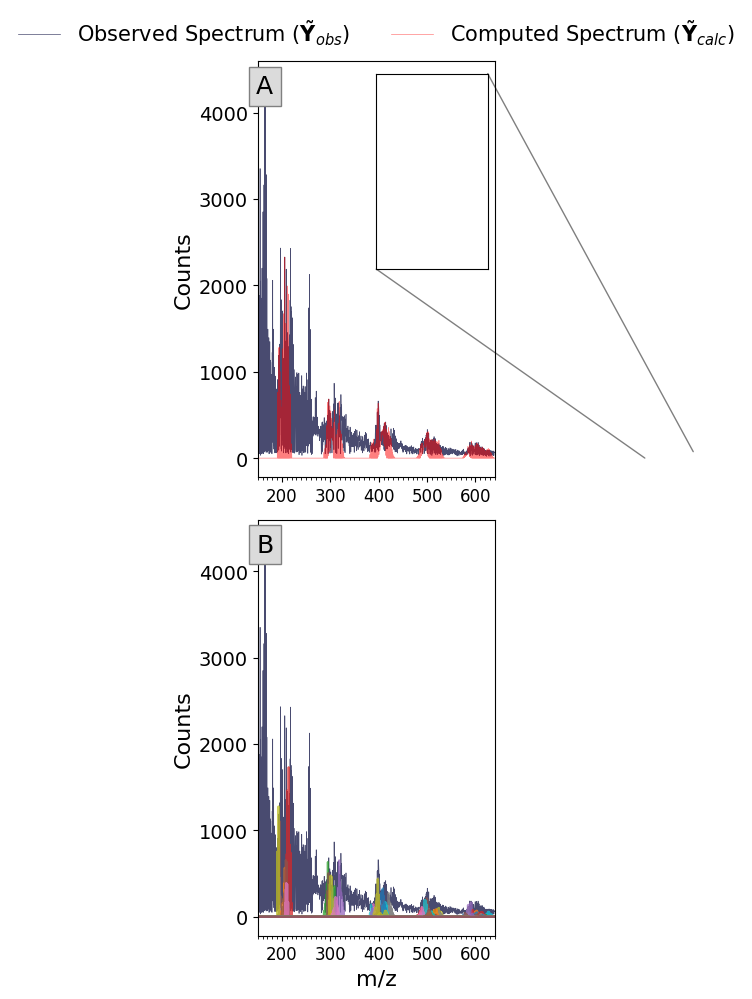

In [ ]:
xlim = (150, 640)
index_range = np.where(np.logical_and(spectra.bin_mz >= xlim[0], spectra.bin_mz <= xlim[1]))
bin_mz = spectra.bin_mz[index_range]
bin_spectra = spectra.bin_intensities[index_range]
computed_spectra = spectra.computed_intensities[index_range]
df = spectra.individual_molecule_spectra_df.iloc[index_range]
df = df.iloc[:, (df !=0).any().values]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=True, figsize=(10, 10))

# First subplot: Compare observed spectra and computed spectra
ax1.plot(bin_mz, bin_spectra,linewidth = 0.5, color ="#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
ax1.plot(bin_mz, computed_spectra, color='red', label=r"Computed Spectrum ($\tilde{\mathbf{Y}}_{calc}$)", alpha = 0.5, linewidth = 0.5)
ax1.set_xlim(xlim)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.get_offset_text().set_fontsize(14)
ax1.get_xaxis().set_visible(True)
ax1.set_ylabel("Counts", fontsize=16)
ax1.legend(fontsize=15, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15),  ncol =5)
#inset_xlim = (950, 1050)

# Filter the data for the inset plot
inset_index_range = np.where(np.logical_and(bin_mz >= inset_xlim[0], bin_mz <= inset_xlim[1]))
inset_bin_mz = bin_mz[inset_index_range]
inset_bin_spectra = bin_spectra[inset_index_range]
inset_computed_spectra = computed_spectra[inset_index_range]

# Create the inset plot for the first subplot
axins1 = ax1.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = inset_xlim, ylim = (0.75, 75))
axins1.plot(inset_bin_mz, inset_bin_spectra, linewidth=0.5, color="#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
axins1.plot(inset_bin_mz, inset_computed_spectra, color='red', label=r"Computed Spectrum ($\tilde{\mathbf{Y}}_{calc}$)", alpha = 0.75, linewidth = 0.75)
axins1.yaxis.set_visible(False)
axins1.xaxis.set_visible(False)
ax1.indicate_inset_zoom(axins1, edgecolor="black")

# Add annotation "A" to the first subplot
ax1.text(0.03, 0.94, 'A', transform=ax1.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))

# Second subplot: Decomposition of observed spectra into individual elements
ax2.plot(bin_mz, bin_spectra, linewidth=0.5,  alpha=1, color = "#494B70", label=r"Observed Spectrum ($\tilde{\mathbf{Y}}_{obs}$)")
for column in df.columns[1:]:
    ax2.plot(bin_mz, df[column], label=column, alpha = 0.75)

ax2.xaxis.set_major_locator(MultipleLocator(100))
ax2.xaxis.set_minor_locator(AutoMinorLocator(10))
ax2.tick_params(axis='x', which='major', labelsize=12)
#ax2.legend(fontsize=15, frameon=False)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_ylabel("Counts", fontsize=16)
ax2.set_xlabel("m/z", fontsize=16)
#inset_xlim = (950, 1050)

# Add annotation "B" to the second subplot
ax2.text(0.03, 0.94, 'B', transform=ax2.transAxes, fontsize=18, va='center', ha='center',
         bbox=dict(facecolor='#DBDBDB', edgecolor='grey', boxstyle='square,pad=0.3'))

# Filter the data for the inset plot
inset_index_range = np.where(np.logical_and(bin_mz >= inset_xlim[0], bin_mz <= inset_xlim[1]))
inset_bin_mz = bin_mz[inset_index_range]
inset_bin_spectra = bin_spectra[inset_index_range]
inset_df = df.iloc[inset_index_range]
bottom_values = np.zeros_like(inset_bin_mz)

# Create the inset plot
axins = ax2.inset_axes([0.5, 0.5, 0.47, 0.47], xlim = inset_xlim, ylim = (0.75, 75), yticklabels=[], yticks = [])
axins.yaxis.set_visible(False)
axins.xaxis.set_visible(False)
axins.plot(inset_bin_mz, inset_bin_spectra, linewidth=0.5, alpha=1, color="#494B70", label=r"Observed Spectrum ($\mathbf{Y}$)")
for column in inset_df.columns[1:]:
    axins.plot(inset_bin_mz, inset_df[column], label=column, alpha=0.75)
    #axins.bar(inset_bin_mz, inset_df[column], label=column, alpha=0.75, bottom=bottom_values)
    #bottom_values += inset_df[column]

# Adjust layout
ax2.indicate_inset_zoom(axins, edgecolor="black")
plt.xlim(xlim[0], xlim[1])
plt.tight_layout()
